(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


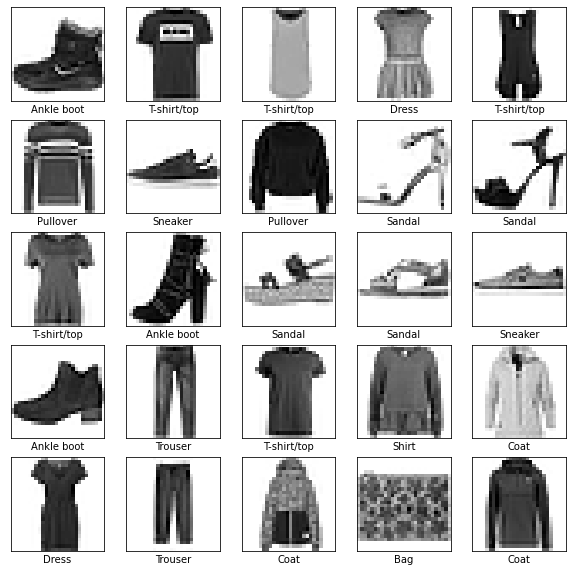

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 2s 720us/step - loss: 0.5012 - accuracy: 0.8238
Epoch 2/20
1875/1875 [==============================] - 1s 722us/step - loss: 0.3794 - accuracy: 0.8636
Epoch 3/20
1875/1875 [==============================] - 1s 732us/step - loss: 0.3385 - accuracy: 0.8779
Ep

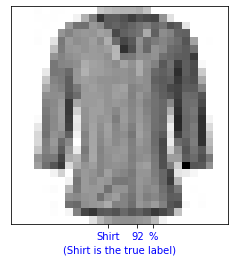

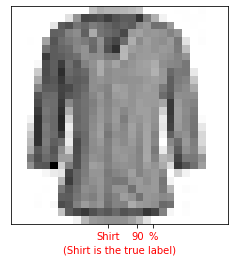

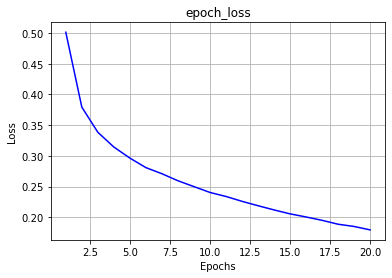

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
import os
import math
#%matplotlib inline

def show_image_grids(train_images, train_labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[train_labels[i]])
  plt.show()

if __name__ == '__main__':
  fashion_mnist = keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  print(train_images.shape)
  print(train_labels.shape)
  print(test_images.shape)
  print(test_labels.shape)
    
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  show_image_grids(train_images, train_labels) 
    
  # Steps 3~8 
  ## Step 3
  train_images = train_images / 255.0
  test_images = test_images / 255.0
  ## Step 4
  model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
        ])
  ## Step 5
  model.summary()

  ## Step 6
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  ## Step 7
  tb_callback = TensorBoard(log_dir='log_fashion')
  ## Step 8
  checkpoint_path = "ckpt_fashion/cp-{epoch:04d}.ckpt"
  cp_callback = ModelCheckpoint(checkpoint_path, 
                                save_weights_only=True,
                                verbose=1, period=5)
  # Steps 9, 10
  history=model.fit(train_images, train_labels, epochs=20, 
            callbacks = [cp_callback, tb_callback])
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  # Step 12
  for epoch in [5, 10, 15, 20]:
      latest = checkpoint_path.format(epoch=epoch)
      model.load_weights(latest)
      
  weight_path = "ckpt_fashion/cp-0020.ckpt"
  model.load_weights(weight_path)
  loss, acc = model.evaluate(test_images, test_labels)
  # loss, acc = model.evaluate(test_images, test_labels)
  loss_list=history.history['loss']
  # Step 13
  prob = model.predict(test_images)
  #按列查找最大元素之index值
  #use argmax 找出prob最大的索引值(index):axis=0：按列查找最大元素 axis=1：按行查找最大元素
  max_prob=np.argmax(prob,axis=1)
  # print("MAX PROB:",max_prob)
  # test_labels_new = test_labels.astype('int64')
  # print("test_labels_new:",test_labels.type)
  pred_res = (max_prob == test_labels)
  print(pred_res)
  true_num = np.sum(pred_res!=0)
  total_number = len(pred_res)
  tmp_accuracy = math.floor((true_num/total_number) * 1000) / 1000.0
  test_acc=math.floor(test_acc * 1000) / 1000.0
  if (tmp_accuracy==test_acc):
      print("The accuracy is the same!")
  else:
      print("The accuracy is not the same...")
  

  ## Step 14
  # test_image[4]預測結果
  print("test_image[4]預測結果:", class_names[max_prob[4]])
  # 對test_image[4]左右翻轉後之預測結果
  test_images[5]=np.fliplr(test_images[4])
  #計算test_image[4]與test_image[4]左右翻轉後的accuracy
  prob_2 = model.predict(test_images[4:6])
  max_prob_2=np.argmax(prob_2,axis=1) 
  a=max_prob_2[0]
  b=max_prob_2[1]
  acc_1 = np.round(prob_2[0,a]*100)
  acc_2 = np.round(prob_2[1,b]*100)
  print("test_image[4] accuracy:", acc_1)
  print("test_image[4]左右翻轉accuracy:", acc_2)
  
  # show the pictures
  plt.grid(False)
  plt.xticks([12,15.8,17.8],
             [class_names[max_prob_2[0]],int(acc_1),"%"],color='b')
  plt.yticks([])
  plt.xlabel('(Shirt is the true label)',color='b')
  plt.imshow(test_images[4], cmap=plt.cm.binary)
  plt.show()
  
  plt.grid(False)
  plt.xticks([12,15.8,17.8],
             [class_names[max_prob_2[1]],int(acc_2),"%"],color='r')
  plt.yticks([])
  plt.xlabel('(Shirt is the true label)',color='r')
  plt.imshow(test_images[5], cmap=plt.cm.binary)
  plt.show()
  

# 1. How many training epochs in model.fit() are required such that the training loss is converged? (epochs=20 其實還未收斂，需畫出 loss vs. epochs 曲線) 
# Write down your observations here.
  epochs = range(1, len(loss_list) + 1)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('epoch_loss')
  plt.grid()
  plt.plot(epochs, loss_list, 'b-') 
# 2. Adjust the batch_size in model.fit(). What will happen if we change batch_size from 32 to 512? (訓練時間是增加或減少？測試正確率是上升或下降？原因為何？)
# Write down your observations here.
# 3. What is the difference between the following two options in model.compile()? 
#	loss='categorical_crossentropy'
#	loss='sparse_categorical_crossentropy'
# Use an example to illustrate the difference.

In [1]:
# 1. How many training epochs in model.fit() are required 
such that the training loss is converged? 
(epochs=20 其實還未收斂，需畫出 loss vs. epochs 曲線) 
Write down your observations here.

在training epochs=200的時候，loss:0.0269 accuracy:0.9903，才收斂


SyntaxError: invalid syntax (Temp/ipykernel_2676/3778799876.py, line 2)

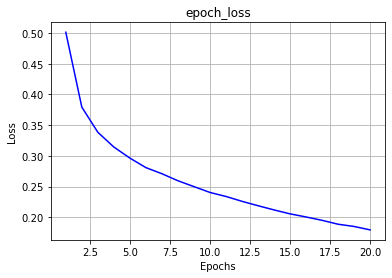

In [2]:
#loss vs. epochs曲線
epochs = range(1, len(loss_list) + 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('epoch_loss')
plt.grid()
plt.plot(epochs, loss_list, 'b-') 

In [ ]:
# 2. Adjust the batch_size in model.fit(). 
#What will happen if we change batch_size from 32 to 512? 
#(訓練時間是增加或減少？測試正確率是上升或下降？原因為何？)
Write down your observations here.
訓練時間明顯減少了，但測試正確率下降至78%與75%。
原因是因為增大batch_size會使得模型的「泛化能力」下降。
batch_size的大小會決定訓練時梯度的平滑程度，而較大的batch_size會有利於模型收斂，但是在訓練模型時跌代的隨機性會變小，所以會影響模型的泛化能力。
較小的batch_size因為訓練資料有較多的隨機性(batch_size越大相鄰batch的差異越小)，模型訓練出來的泛化能力較好。泛化能力就會進而影響到accuracy。
調整不同batch_size時，因為每次迭代所求出的loss平均(梯度)不同，這會影響到模型參數的更新造成最後的accuracy也不同。


In [ ]:
# 3. What is the difference between the following two options in model.
compile()? 
#	loss='categorical_crossentropy'
#	loss='sparse_categorical_crossentropy'
#Use an example to illustrate the difference.

categorical_crossentropy可用於多分類任務，label為one-hot形式。
Example:
    one-hot編碼：
　　[[0, 1, 0],
　　 [1, 0, 0],
　　 [0, 0, 1]]
　　 每条每一行是一个label的编码，1所在的位置代表label

sparse_categorical_crossentropy跟categorical_crossentropy的區別是其標籤不是one-hot的形式，而是integer。
比如在上述categorical_crossentropy的Example中是[1,0,0]，在sparse_categorical_crossentropy中是3。
Example:
    整數編碼：
    [2, 0, 1, 5, 19]
    每個整數都是label
